What quarterbacks do I want to see age analysis. 
1. Tom Brady
2. Peyton Manning
3. Aaron Rodgers
4. Ben Roethlisberger

To-do list:
1. Pull in data from 1999 on
2. passing player filter
3. group by player, epa, season; agg on epa
4. pull in headshot photos

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import nflfastpy as nfl
import requests # we're going to use this to make a HTTP request for player headshots
from io import BytesIO # we're going to use this to load image data

/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/nflfastpy/__init__.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  default_headshot = mpl_image.imread(headshot_url)


In [2]:
data = pd.concat([nfl.load_pbp_data(season).assign(season=season) for season in range(1999, 2021)])

In [3]:
data1 = data.loc[(data['passer_player_name']=='P.Manning') | (data['passer_player_name']=='T.Brady')|(data['passer_player_name']=='A.Rodgers')|(data['passer_player_name']=='B.Roethlisberger')|(data['passer_player_name']=='E.Manning')|(data['passer_player_name']=='J.Flacco')|(data['passer_player_name']=='C.Newton')|(data['passer_player_name']=='P.Rivers')|(data['passer_player_name']=='C.Palmer')|(data['passer_player_name']=='D.Brees')]

In [4]:
data1

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
209,205,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,1.790189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,233,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-0.423891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,322,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,1.434317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,346,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-0.446819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,391,1999_01_BUF_IND,1999091202,IND,BUF,REG,1,IND,home,BUF,...,0,0,-1.795079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48451,2891,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-0.478984,NaN,NaN,NaN,NaN,NaN,0.354682,64.531824
48452,2915,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-0.696506,0.430300,2.087992,0.0,0.997911,0.499870,0.557932,44.206792
48476,3448,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,0.622538,1.066562,6.756434,5.0,0.654692,0.470271,0.449922,55.007833
48479,3516,2020_21_KC_TB,2021020700,TB,KC,POST,21,TB,home,KC,...,0,1,-1.491008,0.818856,8.291892,5.0,1.000000,1.000000,0.262431,73.756939


In [5]:
colors = pd.read_csv('Teams.csv')

In [6]:
data2 = data1.merge(colors[['team_color', 'team_abbr']].rename(columns={'team_abbr': 'posteam'}), on='posteam')

In [7]:
roster_df = nfl.load_roster_data(2015)

In [8]:
roster_df['first_name'] = roster_df['first_name'].str[:1]
roster_df['name'] = roster_df['first_name'] + '.' + roster_df['last_name']

In [9]:
data3 = data2.merge(roster_df[['headshot_url', 'name']], on='name')

In [10]:
df = data3.groupby(['season','passer_player_name', 'team_color', 'headshot_url'], as_index=False).agg({'qb_epa': ['sum']})

In [11]:
df.columns = ['season', 'name', 'team_color', 'headshot_url', 'epa']


/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: list index out of range

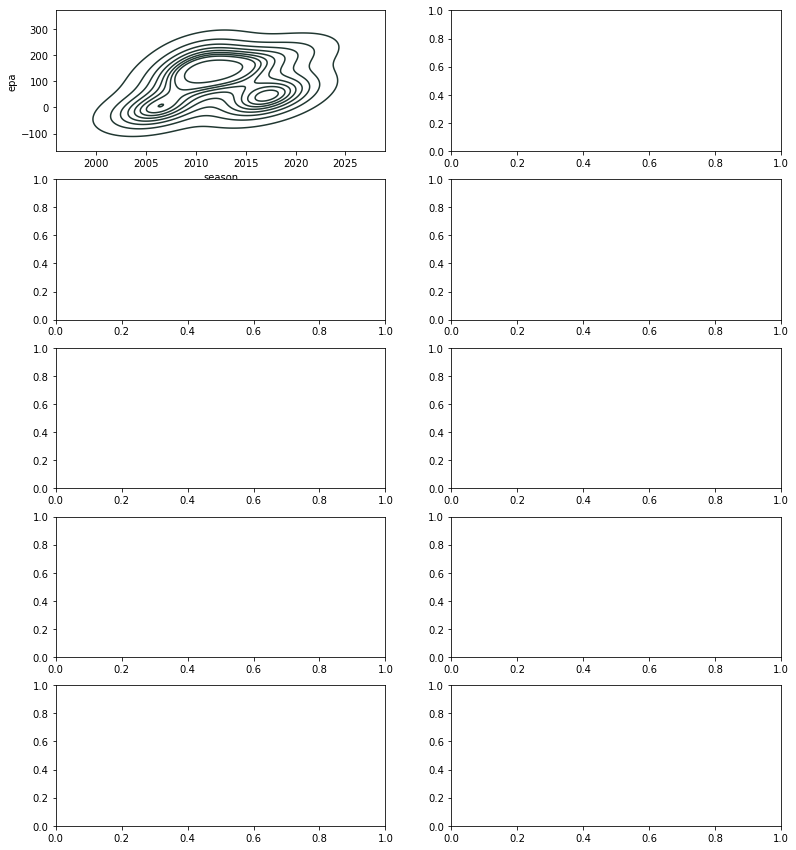

In [18]:
df = data3.groupby(['season','passer_player_name', 'team_color', 'headshot_url'], as_index=False).agg({'qb_epa': ['sum']})

df.columns = ['season', 'name', 'team_color', 'headshot_url', 'epa']

groups = [group for group in df.groupby('name')]

# 5 rows, 2 columns
fig, axes = plt.subplots(5, 2, figsize=(13, 15))

rows, columns = axes.shape[0], axes.shape[1]

i = 0

for row in range(rows):
  for col in range(columns):

    # get the df object
    df = groups[i][-1]

    player_name = df['name'].values[0]

    primary_color = df['team_color'].values[0]

    headshot_url = df['headshot_url'].values[0]

    # make a HTTP request to grab the player image
    response = requests.get(headshot_url)

    # load the image as bytecode
    img = plt.imread(BytesIO(response.content))

    # plot a KDE plot of the player's air yards on the row, col ax and color it with the player's team color
    #ax = sns.lineplot(df['season'], df['epa'], ax=axes[row, col], label=player_name, color=primary_color)

    
    ax.set_aspect('auto')
    
    lines = ax.get_lines()[0].get_xydata()

    x, y = lines[:, 0], lines[:, 1]

    #extent argument left, right, bottom, top
    ax.imshow(img, extent=[2015, 2020, 0, 0.03], aspect='auto', zorder=1000)

    #fill the area underneath the curve
    #ax.fill_between(x, y, color=primary_color, alpha=0.4)
    
    ax.set_xticks(range(1999, 2021, 3))
    
    ax.set_yticks(np.linspace(0, 0.07, 10))

    ax.set_xlabel('season')

    ax.set_ylabel('epa')
    

    #show us the legend
    ax.legend()

    i += 1

#there's a lot of graphs
plt.tight_layout();

In [33]:
manning = df.loc[(df['name']=='P.Manning')]


,season,name,team_color,headshot_url,epa
0,1999,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,116.849679
1,2000,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,142.301490
4,2001,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,24.640885
7,2002,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,63.940346
9,2003,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,168.623178
15,2004,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,248.784242
23,2005,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,178.000012
31,2006,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,186.803986
39,2007,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,168.534998
48,2008,P.Manning,#002C5F,http://static.nfl.com/static/content/public/st...,152.228433


In [41]:
manning.to_csv(r'/Users/moore_austin02/Documents/School Files/NFL Python/Visualization Code/manning.csv')


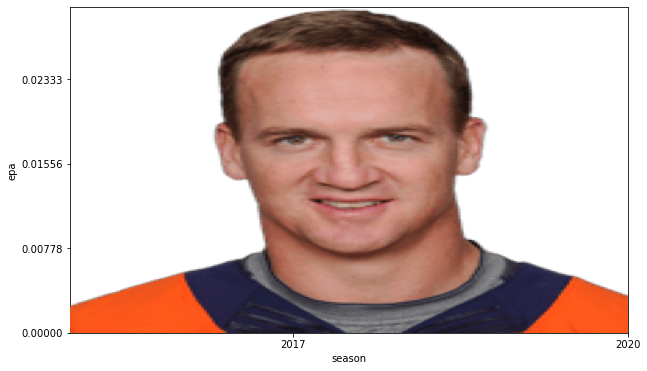

In [40]:
#df = data3.groupby(['season','passer_player_name', 'team_color', 'headshot_url'], as_index=False).agg({'qb_epa': ['sum']})

#df.columns = ['season', 'name', 'team_color', 'headshot_url', 'epa']

x = manning.season
y = manning.epa

player_name = manning['name'].values[0]

primary_color = manning['team_color'].values[0]

headshot_url = manning['headshot_url'].values[0]

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=.001) 

response = requests.get(headshot_url)
img = plt.imread(BytesIO(response.content))


#ax = sns.lineplot(manning['season'], manning['epa'], ax=axes[row, col], label=player_name, color=primary_color)


ax.set_xticks(range(1999, 2021, 3))
    
ax.set_yticks(np.linspace(0, 0.07, 10))

ax.set_xlabel('season')

ax.set_ylabel('epa')


ax.set_aspect('auto')
ax.imshow(img, extent=[2015, 2020, 0, 0.03], aspect='auto', zorder=1000)